# SVM and SVR

- Breast cancer data for classification
- Diabetes data for regression

In [8]:

diabetes_DB = sk.datasets.load_diabetes(as_frame=True, scaled = False)
diabetes_DB.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
import sklearn as sk
import pandas as pd
from sklearn.datasets import load_breast_cancer

breastcancer_DB = sk.datasets.load_breast_cancer()
X, y = breastcancer_DB.data, breastcancer_DB.target
print(breastcancer_DB.keys())
print(breastcancer_DB['feature_names'])
table_BC = pd.DataFrame(X, columns=breastcancer_DB['feature_names'])
table_BC['target']= y
table_BC

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


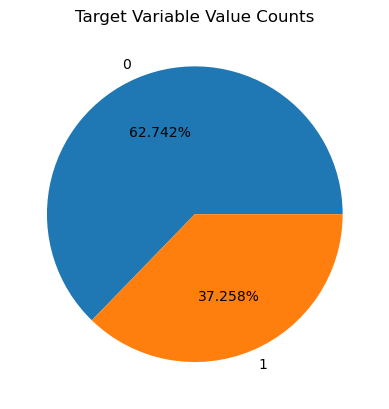

In [ ]:
import matplotlib.pyplot as plt

# get the set of distinct classes
labels = table_BC.target.unique()

# get the count of each class
sizes = table_BC.target.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

<Axes: >

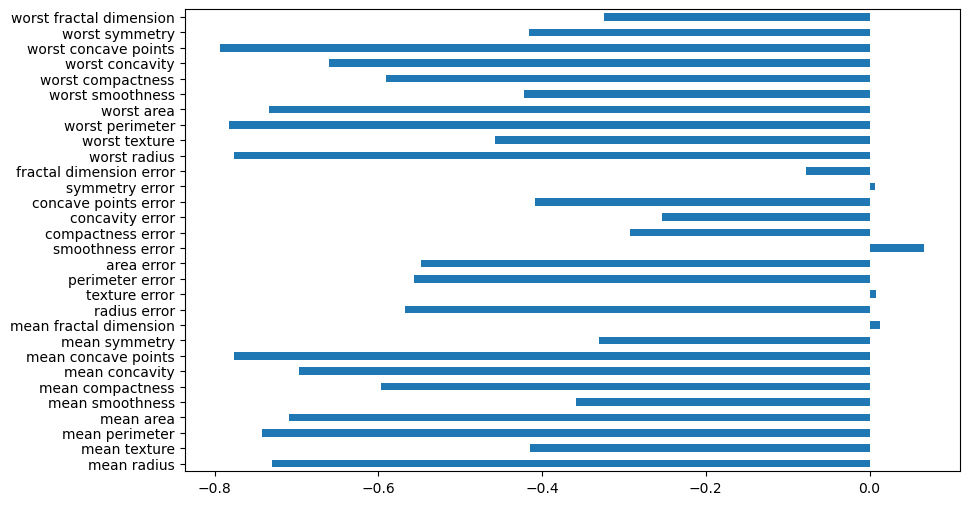

In [10]:
correlation_values = table_BC.corr()['target'].drop('target')
correlation_values.plot(kind='barh', figsize=(10, 6))

## Feature selection using correlation

In [25]:
correlation_values_for_ranking = abs(table_BC.corr()['target']).drop('target')
correlation_values_for_ranking = correlation_values_for_ranking.sort_values(ascending=False)[0:6]
correlation_values_for_ranking

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
Name: target, dtype: float64

In [11]:

from sklearn.preprocessing import normalize, StandardScaler

# standardize features by removing the mean and scaling to unit variance
table_BC.iloc[:, 1:30] = StandardScaler().fit_transform(table_BC.iloc[:, 1:30])
data_matrix = table_BC.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Dataset imbalance:
# Compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset.
from sklearn.utils.class_weight import compute_sample_weight
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [20]:

from sklearn.svm import LinearSVC

# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

## Evaluation and comparaison 

In [21]:
from sklearn.metrics import roc_auc_score
y_pred_dt = dt.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

Decision Tree ROC-AUC score : 0.956
SVM ROC-AUC score: 0.997


-Remind of ROC Curve definition: <br>
<br>
Showing the variation of (1-Specificity) and (1-Precision) in function of the threshold value picked to determine the final class among the binary classes to predict. <br>
The space under ROC curve gives ROC-AUC score, near to 1 meaning a better model.  

In [ ]:
from IPython.display import Image
Image(url="ROCcurve.jpg", width=300, height=300)